# Lê Nguyễn Trung 19146024 
# Bài Tập CNN Fruit Reconigtion

In [31]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import pickle

Chạy file fruit.ipynb trong VS code để tạo file traicay.data -> up file data lên gg drive.

In [32]:
# tai data tu google drive
def load_data():
    file = open('/content/drive/MyDrive/Data/traicay.data', 'rb')
    (pixels, labels) = pickle.load(file)
    file.close()
    print(pixels.shape)
    print(labels.shape)
    return pixels, labels

In [33]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(4627, 128, 128, 3)
(4627, 10)


In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [36]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=40, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/40
58/58 [==============================] - 24s 409ms/step - loss: 2.6368 - accuracy: 0.5712 - val_loss: 0.1293 - val_accuracy: 0.9698
Epoch 2/40
58/58 [==============================] - 22s 374ms/step - loss: 0.2686 - accuracy: 0.9211 - val_loss: 0.0204 - val_accuracy: 0.9968
Epoch 3/40
58/58 [==============================] - 22s 374ms/step - loss: 0.0691 - accuracy: 0.9830 - val_loss: 0.2650 - val_accuracy: 0.9320
Epoch 4/40
58/58 [==============================] - 22s 375ms/step - loss: 0.0399 - accuracy: 0.9887 - val_loss: 0.0097 - val_accuracy: 0.9989
Epoch 5/40
58/58 [==============================] - 22s 375ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.3979 - val_accuracy: 0.9341
Epoch 6/40
58/58 [==============================] - 23s 391ms/step - loss: 0.4713 - accuracy: 0.8844 - val_loss: 0.1016 - val_accuracy: 0.9741
Epoch 7/40
58/58 [==============================] - 22s 371ms/step - loss: 0.1459 - accuracy: 0.9673 - val_loss: 0.0294 - val_accuracy: 0.9957

In [49]:
model.save('fruit.h5')

In [50]:
from keras.models import load_model
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

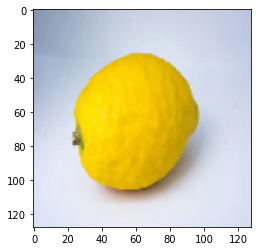

In [55]:
##
img = load_img('/content/chanh.jpg',target_size=(128,128))
plt.imshow(img)


In [52]:
class_name = ['bo','cam','chanh','chuoi','dua hau', 'luu ', 'mang cut','tao','thanh long', 'vai']

In [56]:
img = cv.imread('/content/chanh.jpg')
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
img = np.expand_dims(img, axis=0)

In [57]:
model_5 = load_model('fruit.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('chanh', array([1.6520147e-29, 1.7453469e-30, 1.0000000e+00, 1.0725765e-24,
        2.3794905e-22, 6.4818149e-13, 3.4119623e-22, 7.3973310e-12,
        6.0692736e-28, 2.9244312e-17], dtype=float32))